# DATA ANALYSIS FOR STEADY STATE SIMULATED DATA (PIPELINE : VVSPL) (Trends : Multiple)

### 1. IMPORT NECESSARY LIBRARIES

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statistics as st
import math

### 2. PROVIDE DATA PATHS AND CONVERT TO A DATAFRAME

In [107]:
data_path = 'steady.csv'

df = pd.read_csv(data_path)

print("THIS IS THE FIRST 5 ROWS OF THE DATA\n", df.head())

print("THE NUMBER OF RECORDS ARE : ", len(df))

print("THE",len(df.columns) ,"COLUMNS OF THE DATA ARE : \n", '\n'.join(df.columns))

THIS IS THE FIRST 5 ROWS OF THE DATA
    Seconds        Timestamp_IST  S1-PT-1001A  10-PI-1110  S1-TT-1001A  \
0        0  2025-08-12 16:30:53    81.525495   94.059582    25.463019   
1        5  2025-08-12 16:30:58    81.531672   94.065790    25.453725   
2       10  2025-08-12 16:31:03    81.531354   94.049099    25.470918   
3       15  2025-08-12 16:31:08    81.532418   93.975287    25.455651   
4       20  2025-08-12 16:31:13    81.405468   93.980069    25.451016   

   10-TI-1103  S2-PT-1002A  S2-TT-1002A  20-PT-1312  S2-PT-1002B  ...  \
0   24.994202    16.110440    27.351981    4.998917    16.115449  ...   
1   25.005818    16.106241    27.330663    5.003575    16.107627  ...   
2   24.978400    16.103061    27.338960    5.003476    16.109046  ...   
3   25.025070    16.098854    27.331415    5.002732    16.104863  ...   
4   25.002667    16.122890    27.347044    4.998582    16.113627  ...   

   MOV_3018  11-PT-1203.1  TT-1201B.1  MOV_1206  MOV_3019  S1-PT-1001B.1  \
0       

### 3. THE DESCRIPTION OF DATA :

In [108]:
df.describe()

,Seconds,S1-PT-1001A,10-PI-1110,S1-TT-1001A,10-TI-1103,S2-PT-1002A,S2-TT-1002A,20-PT-1312,S2-PT-1002B,20-TE,...,MOV_3018,11-PT-1203.1,TT-1201B.1,MOV_1206,MOV_3019,S1-PT-1001B.1,S1-TT-1001B.1,S2-PT-1002B.1,S2-TT-1002B.1,20-MOV-1304
count,8641.000000,8641.000000,8641.000000,8641.000000,8641.000000,8641.000000,8641.000000,8641.000000,8641.000000,8641.000000,...,8641.0,8641.000000,8641.000000,8641.0,8641.0,8641.000000,8641.000000,8641.000000,8641.000000,8641.0
mean,21600.000000,81.516184,94.031277,25.457007,25.000048,16.106358,27.340418,5.001796,16.105734,27.592577,...,1.0,48.453739,26.503230,1.0,1.0,81.515191,25.456798,16.105711,27.340806,1.0
std,12472.930857,0.041010,0.048087,0.013003,0.012626,0.008179,0.013862,0.002547,0.008270,0.014047,...,0.0,0.024706,0.013480,0.0,0.0,0.041519,0.012909,0.008185,0.013977,0.0
min,0.000000,81.368060,93.855469,25.407916,24.951480,16.072948,27.289903,4.991327,16.073253,27.541874,...,1.0,48.367274,26.438872,1.0,1.0,81.361415,25.408205,16.076009,27.285194,1.0
25%,10800.000000,81.488623,93.999383,25.448249,24.991396,16.100892,27.330977,5.000058,16.100118,27.583352,...,1.0,48.437135,26.494351,1.0,1.0,81.487100,25.448155,16.100107,27.331452,1.0
50%,21600.000000,81.516057,94.030973,25.457091,25.000058,16.106265,27.340369,5.001774,16.105751,27.592359,...,1.0,48.453942,26.503162,1.0,1.0,81.515216,25.456808,16.105716,27.340840,1.0
75%,32400.000000,81.543373,94.064645,25.465814,25.008628,16.111900,27.349890,5.003501,16.111339,27.602148,...,1.0,48.470437,26.512123,1.0,1.0,81.543089,25.465590,16.111323,27.350179,1.0
max,43200.000000,81.673162,94.235807,25.510942,25.053641,16.135113,27.395008,5.011922,16.142788,27.644921,...,1.0,48.542302,26.553496,1.0,1.0,81.682941,25.503120,16.136302,27.398760,1.0


## 4. PLOTTING A PRESSURE TREND ACROSS TIME

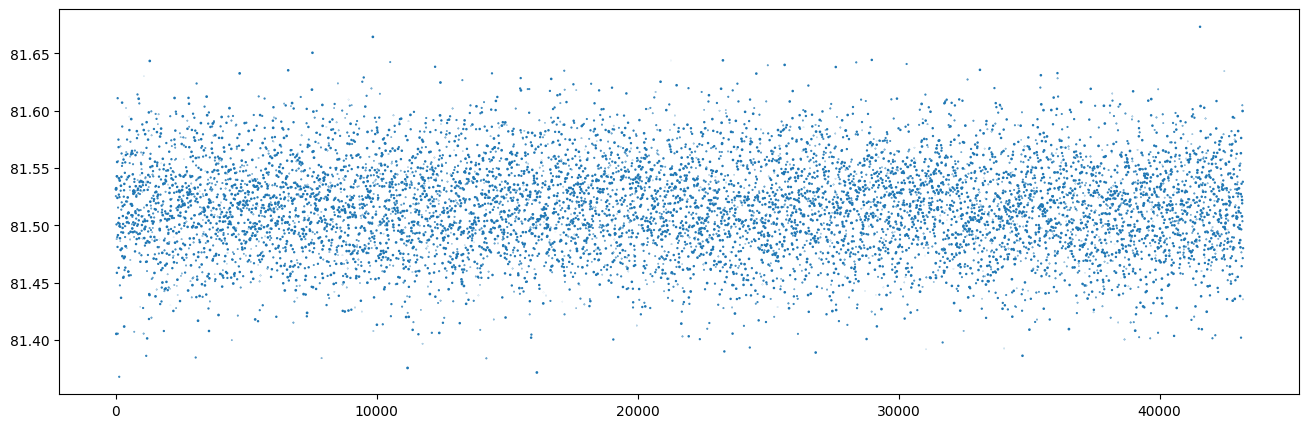

THE STANDARD DEVIATION OF THE PRESSURE TREND :  0.041007772108197935
THE MEAN OF THE PRESSURE TREND IS  : 81.51618447421274


In [109]:
trend = 'S1-PT-1001A'

y = df[trend]
x = df['Seconds']
c = np.random.random(len(df))

plt.figure(figsize=(16, 5))
plt.scatter(x, y, c)

plt.show()

print("THE STANDARD DEVIATION OF THE PRESSURE TREND : ", np.std(y))

print(f"THE MEAN OF THE PRESSURE TREND IS  : {np.mean(y)}")

## 5. PLOTTING THE 'rolling' TREND

Because, nothing groundbreaking has been derieved from the above plot except a few stats have been derieved form the above trend we'll try plotting the rolling from the mean for every reading

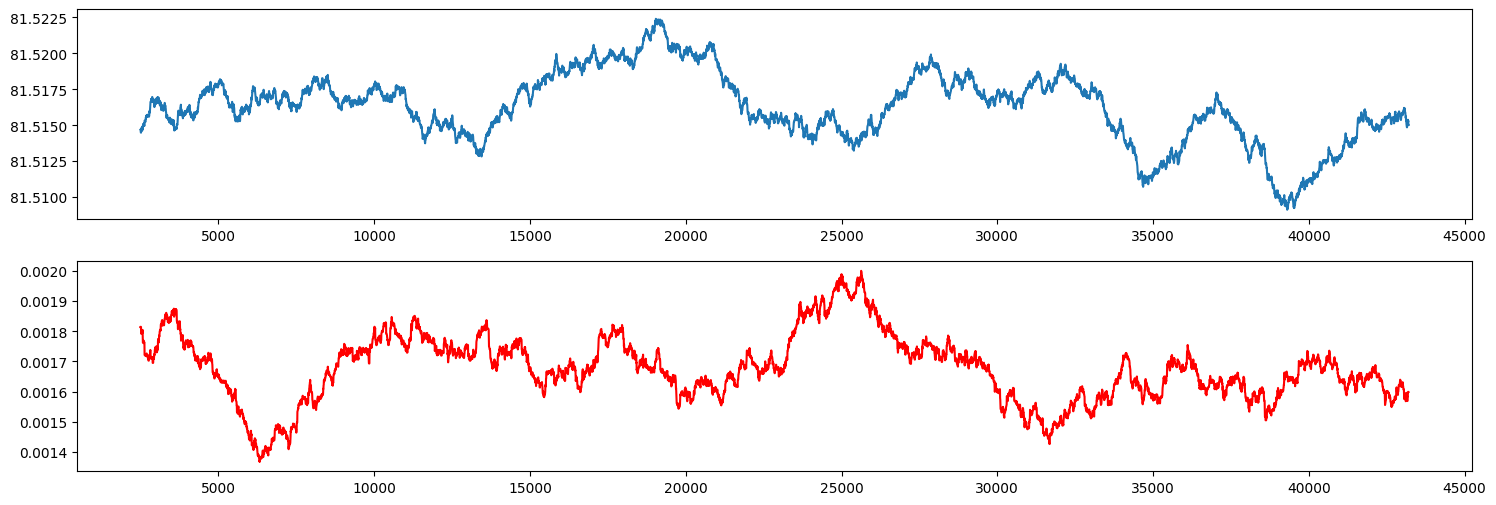

In [110]:
y_mean = df[trend].rolling(window= 500).mean()
y_var = df[trend].rolling(window= 500).var()
x = df['Seconds']

fig, ax = plt.subplots(2, 1, figsize=(18,6)) # 2 row, 1 cols
ax[0].plot(x, y_mean)
ax[1].plot(x, y_var, color = 'red')


In [111]:
# # Because Df type removes first len of win_size elements, We'll write our own logic so that most data values are not missed when window size is large 
# # (large win size enables better trned analysis)

# window_size = 5000
# mv_avg = []
# i = 0
# while i < len(y):
    


## 6 . PLOTTING THE Smoothed Curve trend

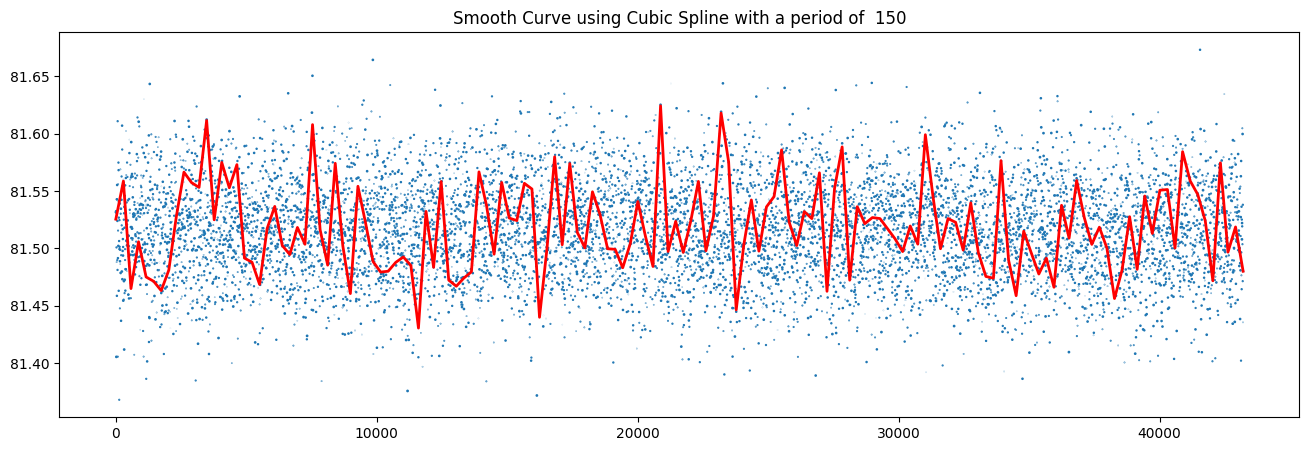

In [ ]:
x_spline = np.linspace(x.min(), x.max(), 150)

model = scipy.interpolate.make_interp_spline(x, y)
y_spline = model(x_spline)

checky_sin = np.multiply(np.sqrt(([np.mean(y)] * len(x_spline) ) +  (np.sin(0.9* x_spline) * np.std(y) * 2.3)), np.sqrt(model(x_spline)))

plt.figure(figsize=(16, 5))
plt.plot(x_spline, y_spline, color='red', linewidth=2)

plt.scatter(x, y, c)
plt.title(f'Smooth Curve using Cubic Spline with a period of  {len(x_spline)}')
plt.show()

final_function = np.multiply(np.sqrt(([np.mean(y)] * len(x) ) +  (np.sin(0.9 * x) * np.std(y) * 2.3)), np.sqrt(model(x)))




In [188]:
print(f"THE LOSS INT THE FUNCTIONS IS : {np.mean(np.sqrt(np.abs(y_spline - checky_sin)))}")
print(f"THE FINAL LOSS FUNCTION BETWEN ACTUAL DATA AND CUSTOME FUNCTION SI : {np.mean(np.sqrt(np.abs(final_function - y)))}")
print(f"THE CUSTOM FUNCTION STD IS  : {np.std(checky_sin)}")
print(f"THE STD DEVAIATION OF THE SPLAINE IS : {np.std(y_spline)}")
print(f"THE STD DEVIATION FO TEH WHOLE DATA IS : {np.std(y)}")

THE LOSS INT THE FUNCTIONS IS : 0.1707612290030103
THE FINAL LOSS FUNCTION BETWEN ACTUAL DATA AND CUSTOME FUNCTION SI : 0.17018635706479512
THE CUSTOM FUNCTION STD IS  : 0.03821978839452564
THE STD DEVAIATION OF THE SPLAINE IS : 0.03799916857072887
THE STD DEVIATION FO TEH WHOLE DATA IS : 0.041007772108197935


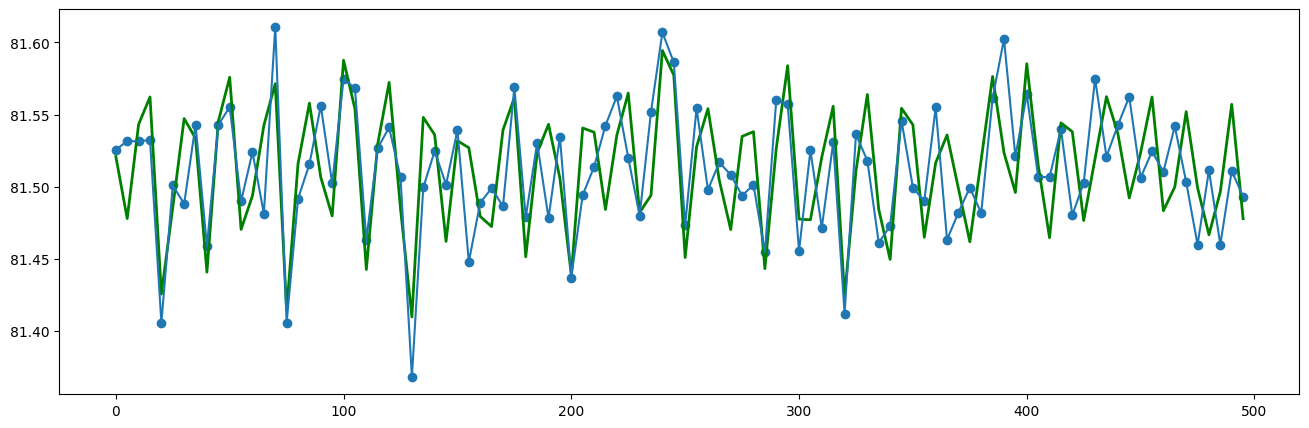

In [194]:
plt.figure(figsize=(16, 5))
plt.plot(x[:100], final_function[:100], color='green', linewidth=2)
plt.scatter(x[:100], y[:100])
plt.plot(x[:100], y[:100])

## 7. BATCH AVERAGING PLOTS

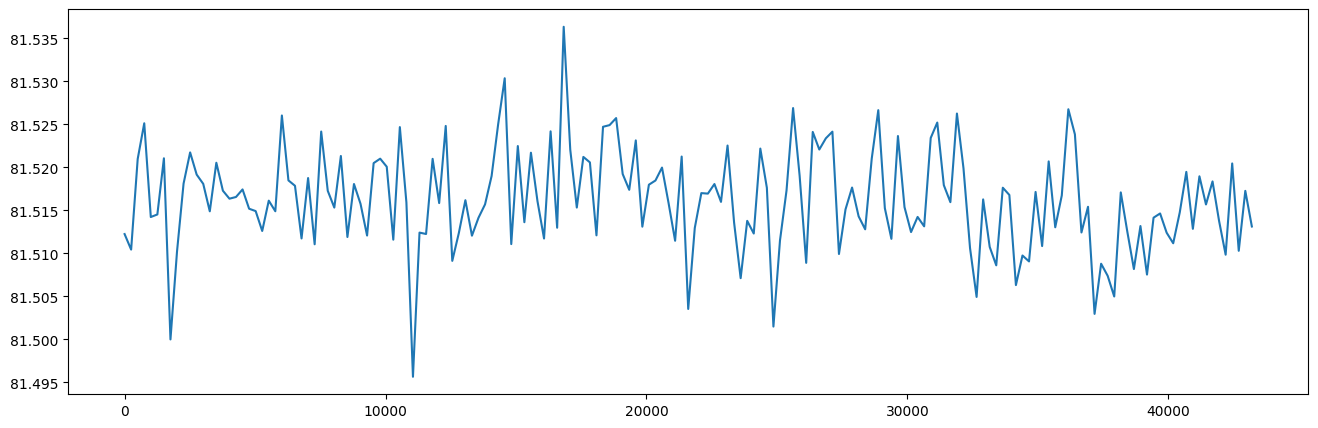

In [114]:
# PARAMETER = MEAN / AVERAGE
batch = 50
mean_interval = []
i = 0
while i < len(y):
    mean_interval.append(np.mean(y[i : i + batch]))
    i = i + batch

x_dis = np.linspace(x.min(), x.max(), len(x) // batch + 1)
plt.figure(figsize=(16, 5))
plt.plot(x_dis, mean_interval)

### INSIGHTS : The analysis until now has been done on a univariate feature. no inference is donw ith correlation wrt to each other. We can deduce that the senor readings are often ossciallating between a range with high freqnecy wrt to time periods, thus a 'THRESHOLD' with an account of previous data can be taken to detect any problems univariately if a single data feed is given, i.e either a rolling window or a LSTM based technique, using which we could adjust the threshold values accordingly. NOTE THAT THIS INFERENCE IS DONE AND MIGHT BE ONLY VALID FOR SINGLE STATE

## PART 2 : MULTIVARIATE ANALYSIS & INFERENCE

In [115]:
# BASED ON Pipeline Lookup of VVSPL

# for pipe VISHAKA_SV1, the sensor at UpPressure is 10-PI-1110 and the DownPressure is S1-PT-1001A
# for pipe SV1_CP4, the sensors at UpPRessure is S1-PT-1001B and the DownPressure is C4-PI-1016
# for pipe VISHAKA_SV1, the sensor at UpTemp is 10-TI-1103 and the DownTemp is S1-TT-1001A
# for pipe IPS1_CP7, the sensor at UpPressure is 11-PT-1203 and the DownPressure is 67-PI-1016
# for SV2_RAJAMUNDRY, S2-PT-1002B, 20-PT-1312
# for SV2_RAJAMUNDRY, S2-TT-1002B, 20-TE-1310
# for CP8_SV2, C8-PI-1016, S2-PT-1002A [NDS] and onlt ,S2-TT-1002A
# SV2_RAJAMUNDRY IS THE LAST STATION AND SV1_VISHKA IS FIRST


### 1. GIVE VARS AND SET PARAMS

In [116]:
up_sv1 = df['10-PI-1110']
down_sv1 = df['S1-PT-1001A']

up_sv2 = df['S2-PT-1002A']
down_sv2 = df['20-PT-1312']


### 2. PLOT Up_Pressure vs Down_Pressure

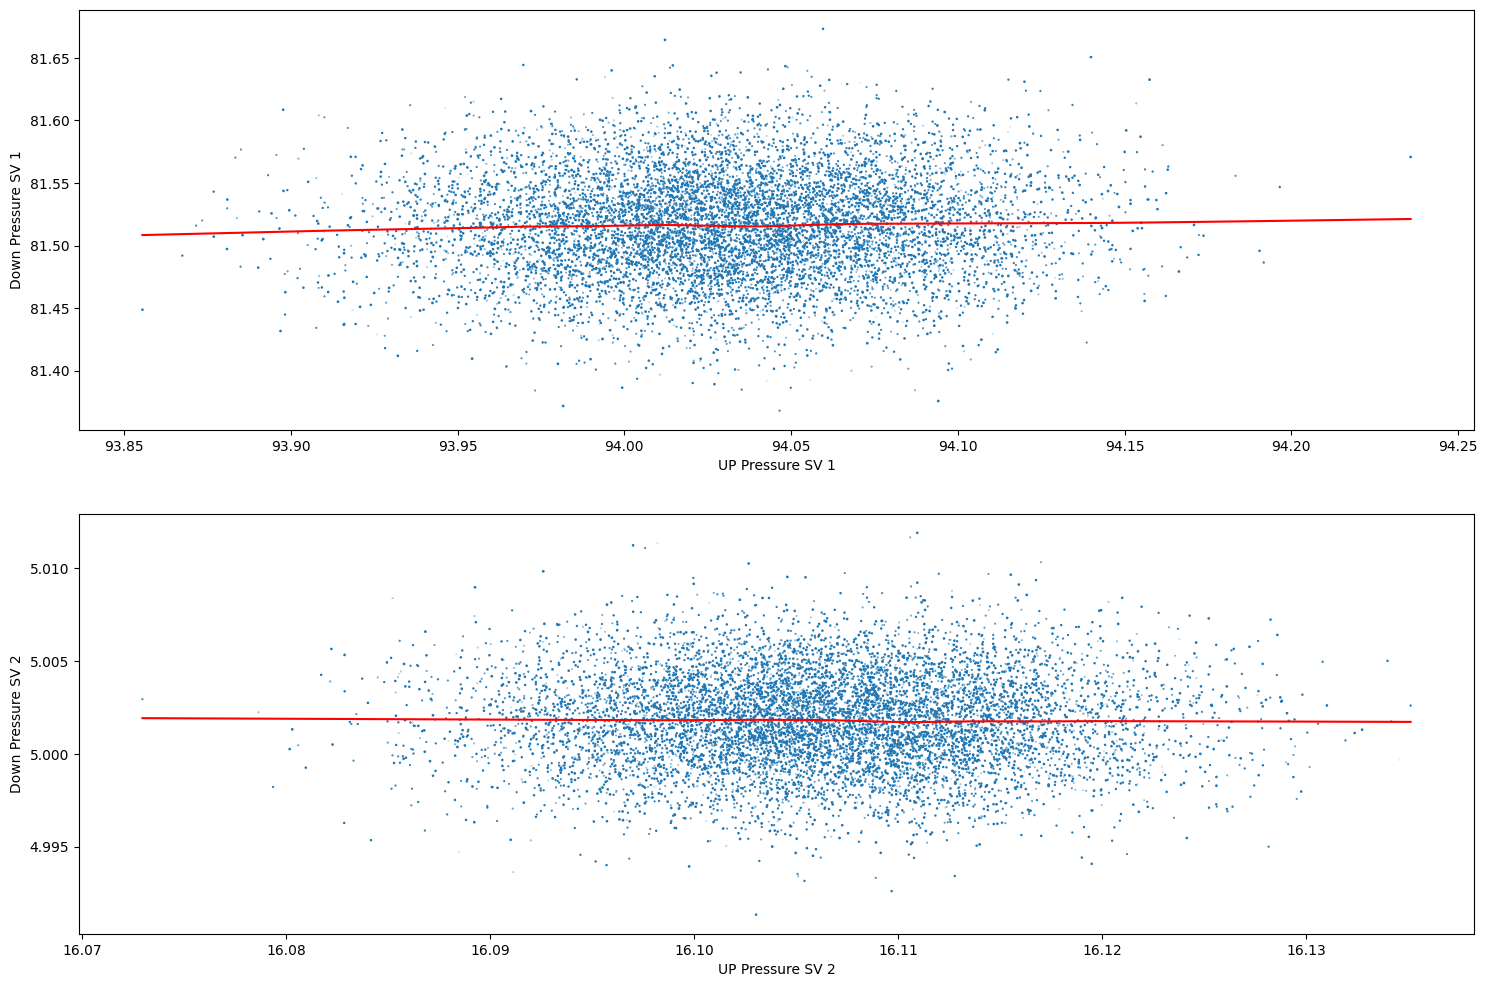

In [117]:
fig, ax = plt.subplots(2, 1, figsize=(18,12))
ax[0].scatter(up_sv1, down_sv1, c)
ax[0].set_xlabel("UP Pressure SV 1")
ax[0].set_ylabel("Down Pressure SV 1")

ax[1].scatter(up_sv2, down_sv2, c)
ax[1].set_xlabel("UP Pressure SV 2")
ax[1].set_ylabel("Down Pressure SV 2")

# sv1_spline = scipy.interpolate.make_interp_spline(up_sv1, down_sv1, k = 100)
# sv2_spline = scipy.interpolate.make_interp_spline(up_sv2, down_sv2, k = 100)
# up_sv1_spline = np.linspace(up_sv1.min(), up_sv1.max(), 300)
# up_sv2_spline = np.linspace(up_sv2.min(), up_sv2.max(), 300)

# down_sv1_spline = sv1_spline(up_sv1_spline)
# down_sv2_spline = sv2_spline(up_sv2_spline)

# ax[0].plot(up_sv1_spline, down_sv1_spline)
# ax[1].plot(up_sv2_spline, down_sv2_spline)

import statsmodels.api as sm

lowess1 = sm.nonparametric.lowess(down_sv1, up_sv1, frac=0.5)
lowess2 = sm.nonparametric.lowess(down_sv2, up_sv2, frac=0.5)


ax[0].plot(lowess1[:,0], lowess1[:,1], color='red')
ax[1].plot(lowess2[:,0], lowess2[:,1], color='red')


### 3. Pressures wrt to Time

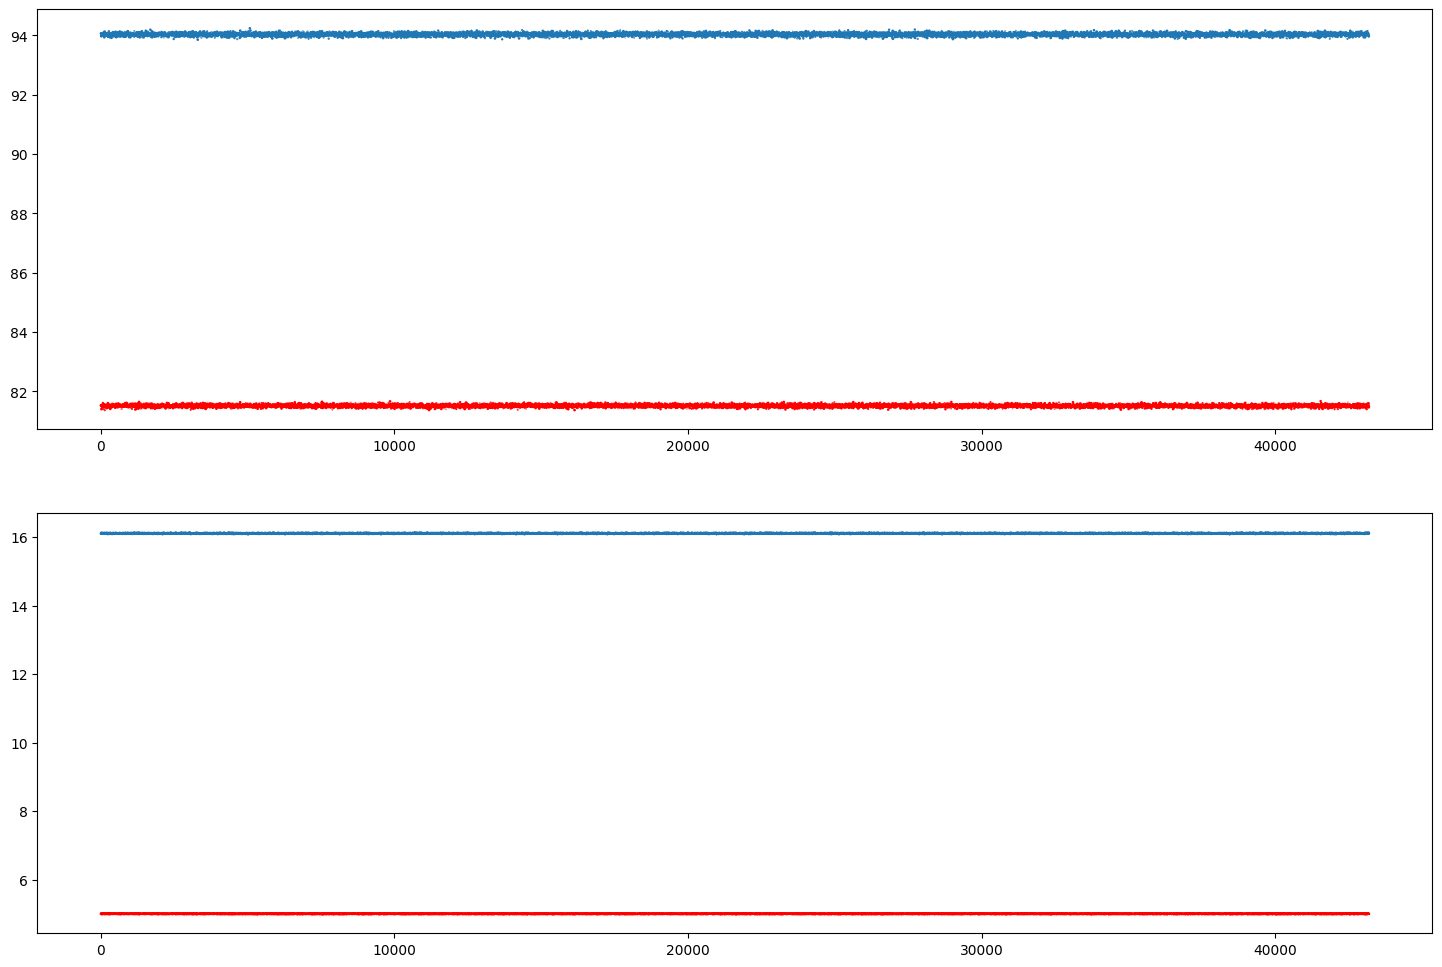

In [118]:
fig, ax = plt.subplots(2, 1, figsize=(18,12))

ax[0].scatter(x, up_sv1, c)
ax[0].scatter(x, down_sv1, c,  color= 'red')

ax[1].scatter(x, up_sv2, c)
ax[1].scatter(x, down_sv2, c, color= 'red')

### PLOTS of PRESSURE_ROLLING

In [119]:
up_sv1_r = df['10-PI-1110'].rolling(window=1000).mean()
down_sv1_r = df['S1-PT-1001A'].rolling(window=1000).mean()

up_sv2_r = df['S2-PT-1002A'].rolling(window=1000).mean()
down_sv2_r = df['20-PT-1312'].rolling(window=1000).mean()

len(up_sv1_r)

8641

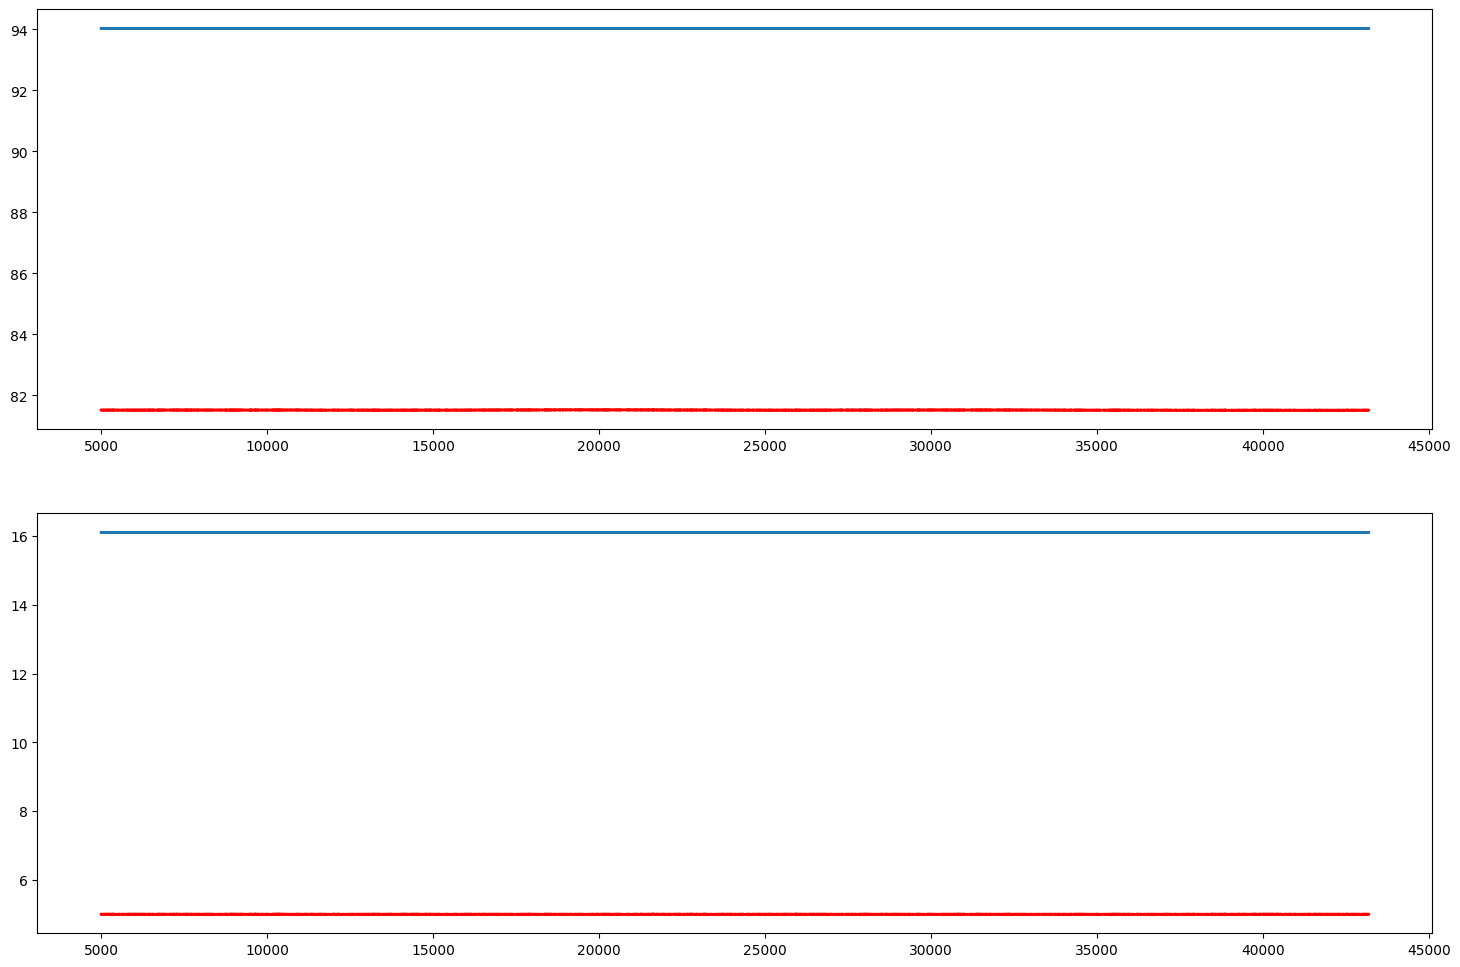

In [120]:
fig, ax = plt.subplots(2, 1, figsize=(18,12))

ax[0].scatter(x, up_sv1_r, c)
ax[0].scatter(x, down_sv1_r, c,  color= 'red')

ax[1].scatter(x, up_sv2_r, c)
ax[1].scatter(x, down_sv2_r, c, color= 'red')

### 4. SBS COMPARISION OF END AND START PRESSURES (REV) [ROLLING]

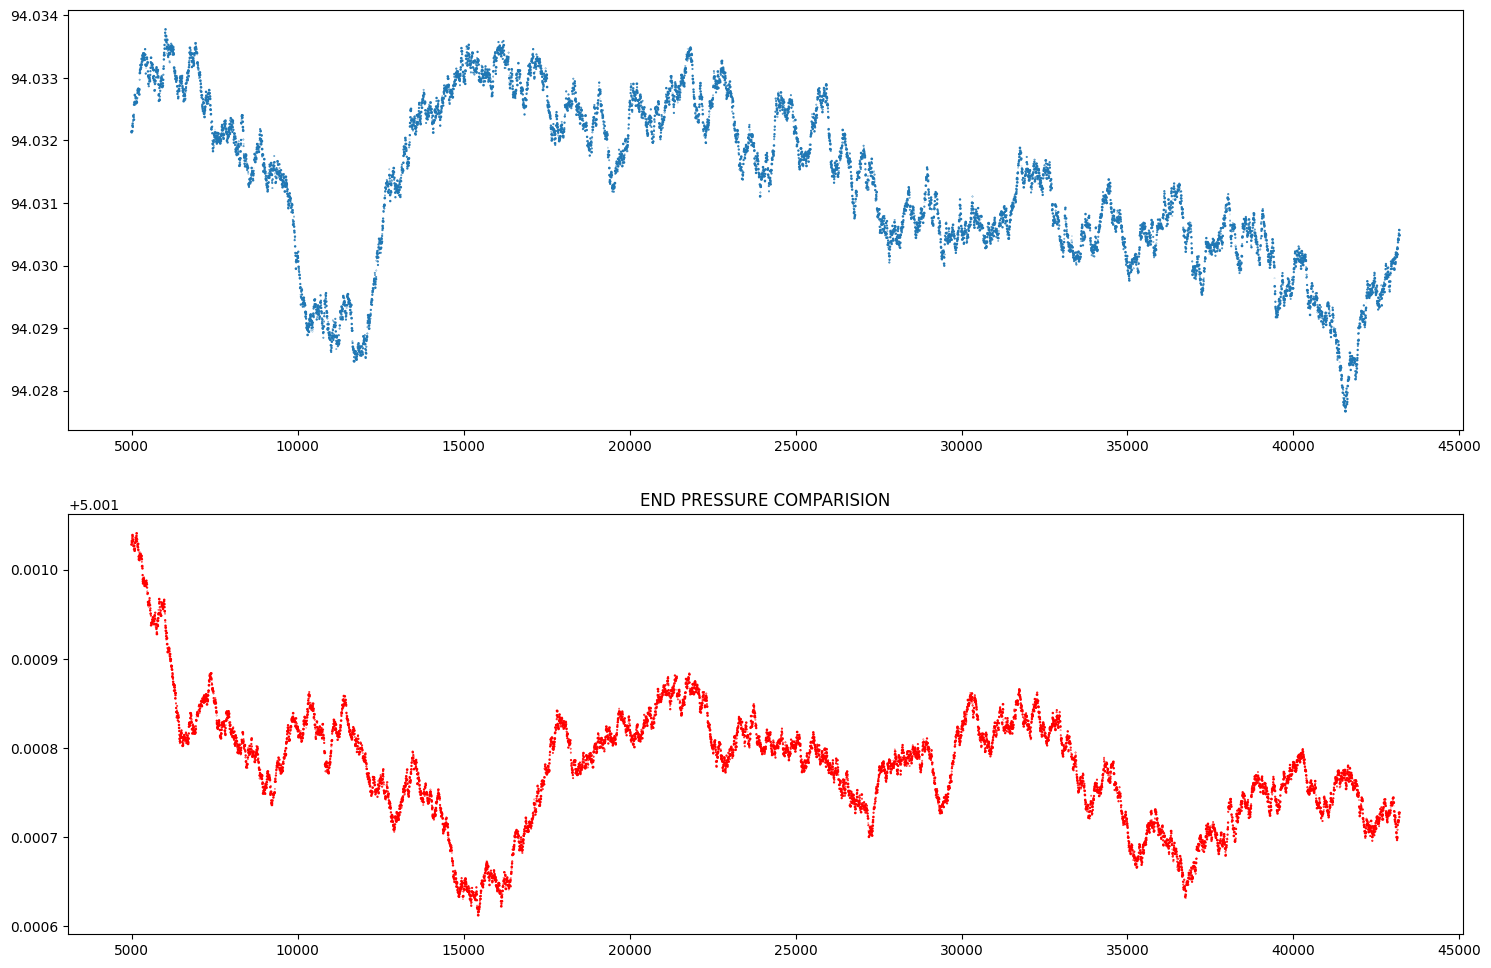

In [121]:
fig, ax = plt.subplots(2, 1, figsize=(18,12))
plt.title("END PRESSURE COMPARISION")

ax[0].scatter(x, up_sv1_r, c)

ax[1].scatter(x, down_sv2_r, c, color= 'red')

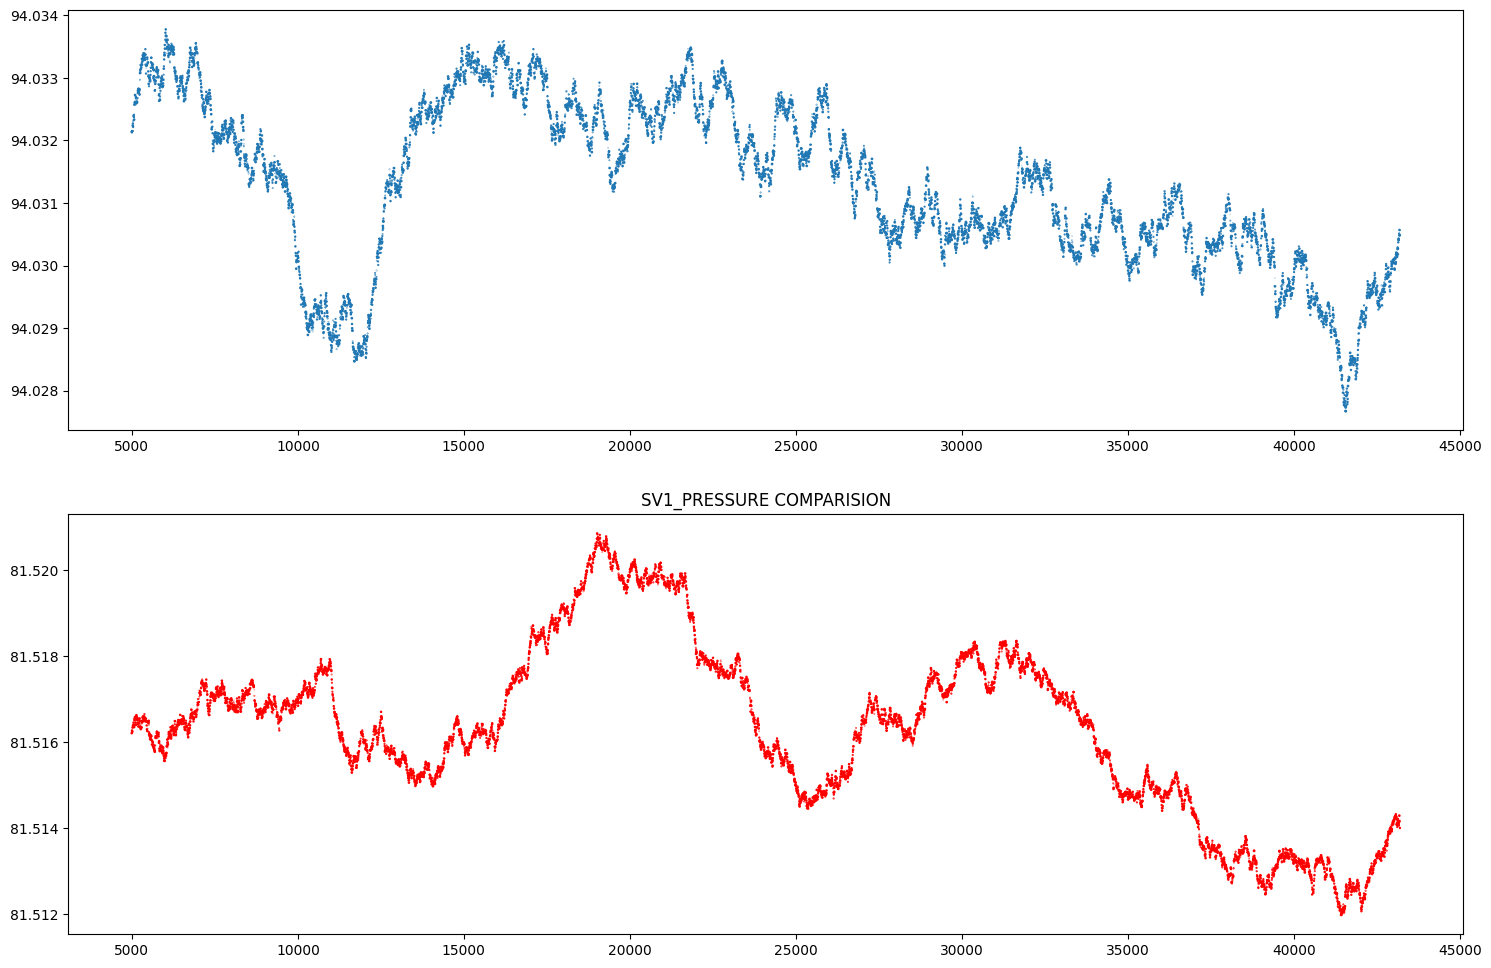

In [122]:
fig, ax = plt.subplots(2, 1, figsize=(18,12))
plt.title("SV1_PRESSURE COMPARISION")
ax[0].scatter(x, up_sv1_r, c)
ax[1].scatter(x, down_sv1_r, c,  color= 'red')


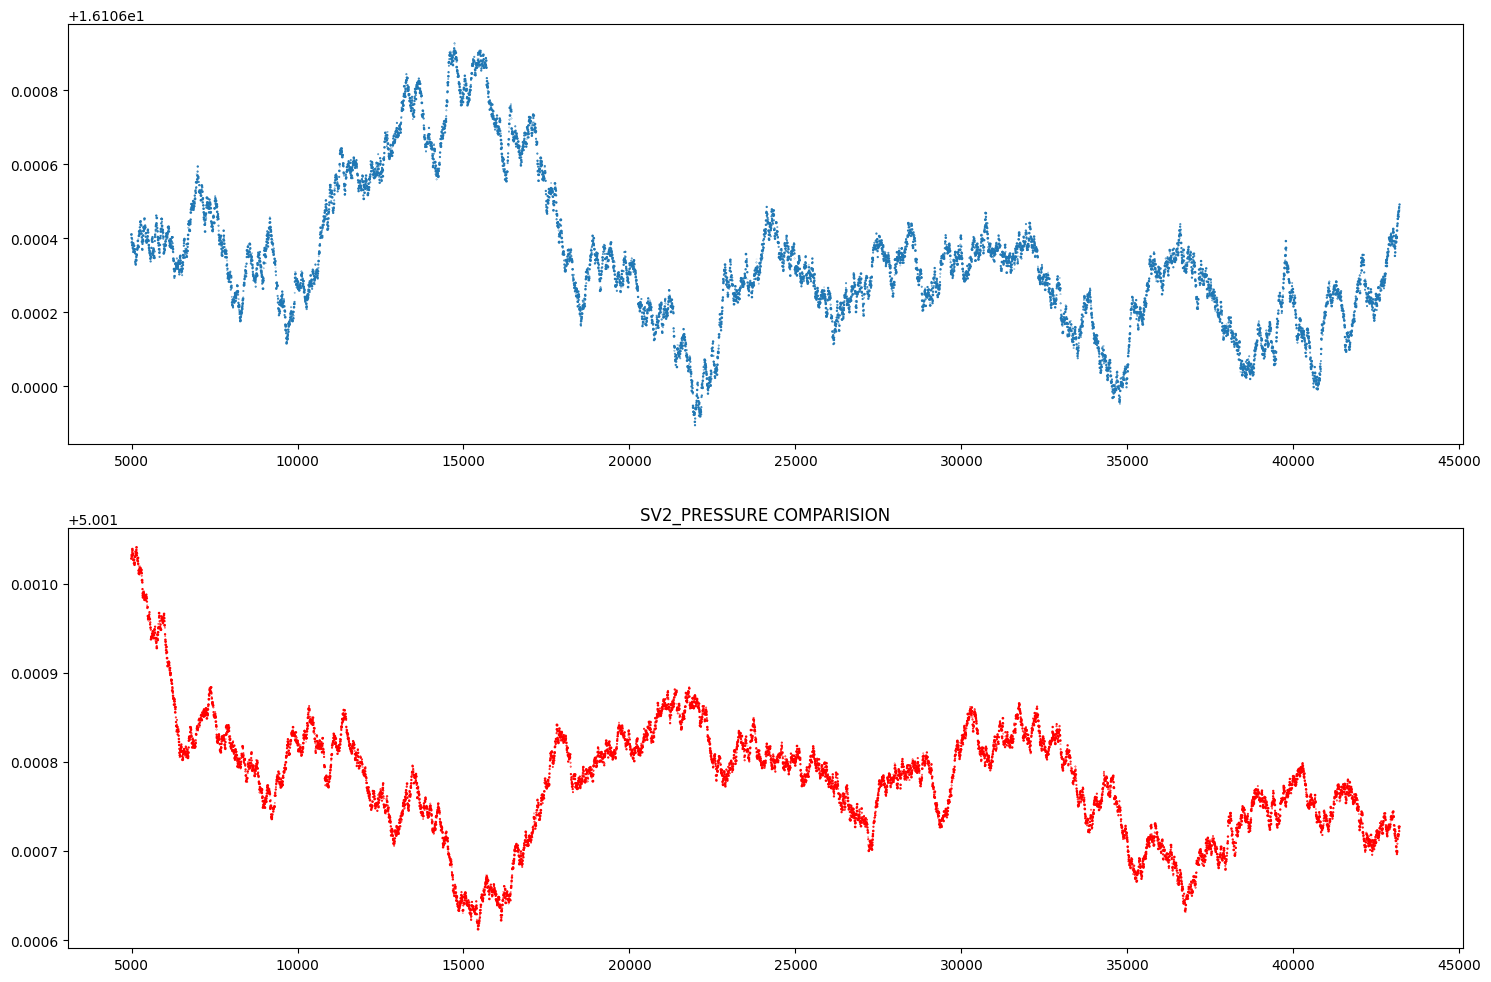

In [123]:
fig, ax = plt.subplots(2, 1, figsize=(18,12))
plt.title("SV2_PRESSURE COMPARISION")
ax[0].scatter(x, up_sv2_r, c)
ax[1].scatter(x, down_sv2_r, c,  color= 'red')


### 5. PLOTTING DIfferences wrt to time for Sv1 and sv2

In [124]:
up_sv1 = df['10-PI-1110']
down_sv1 = df['S1-PT-1001A']

up_sv2 = df['S2-PT-1002A']
down_sv2 = df['20-PT-1312']


Text(0.5, 1.0, 'SV2_diff')

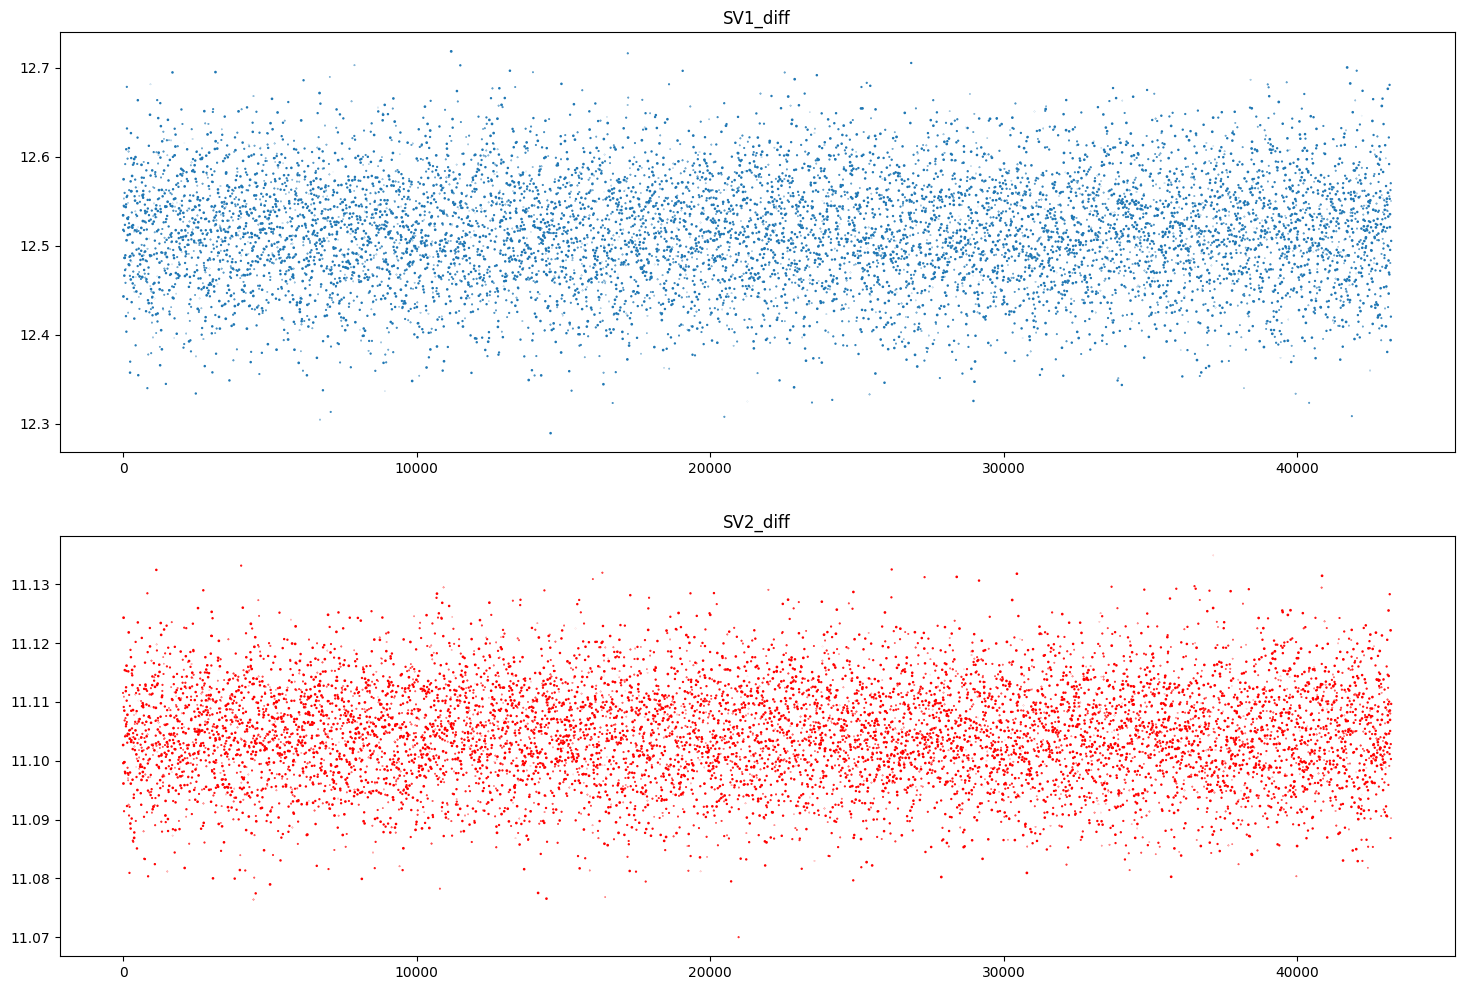

In [125]:
fig, ax = plt.subplots(2, 1, figsize=(18,12))

ax[0].scatter(x, up_sv1 - down_sv1, c)
ax[0].set_title("SV1_diff")
ax[1].scatter(x, up_sv2 - down_sv2, c,  color= 'red')
ax[1].set_title("SV2_diff")

### 6. TRYING TO CLUSTER IN STEADY STSE AND CHECK RESULTS FOR FURThER SCOPE WITH SEPERATION BASED ANOMALY DETCETION ALGOTRITHMS

In [126]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler() # take smoothes for better analysis
X_s = scaler.fit_transform(up_sv1_r)

dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(10,6))
scatter = plt.scatter(up_sv1_r, down_sv1_r, c=labels, cmap='tab10', alpha=0.7)
plt.xlabel("Upstream Pressure (smoothed)")
plt.ylabel("Downstream Pressure (smoothed)")
plt.title("DBSCAN Clustering - Steady State with Noise")
plt.colorbar(scatter, label="Cluster ID (-1 = noise)")
plt.show()


ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

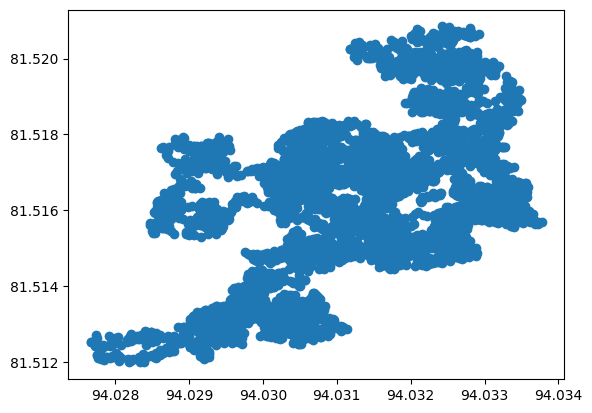